In [2]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

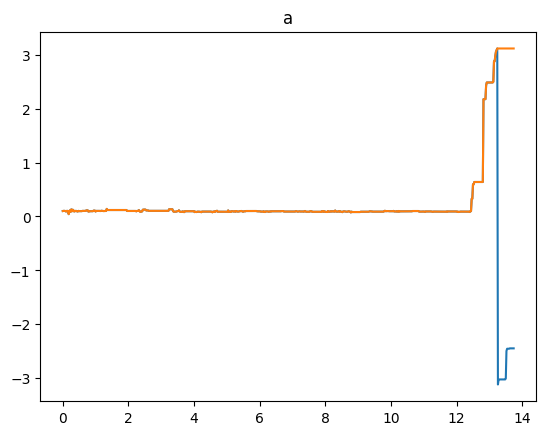

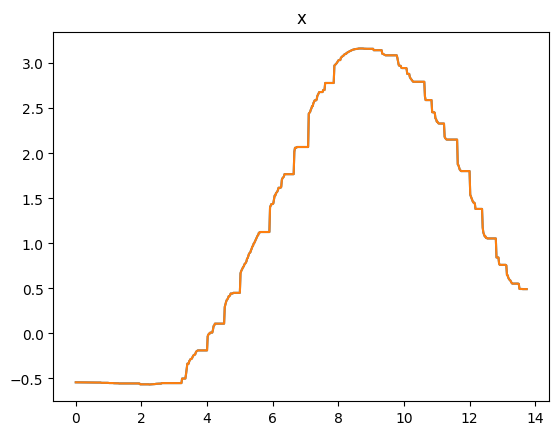

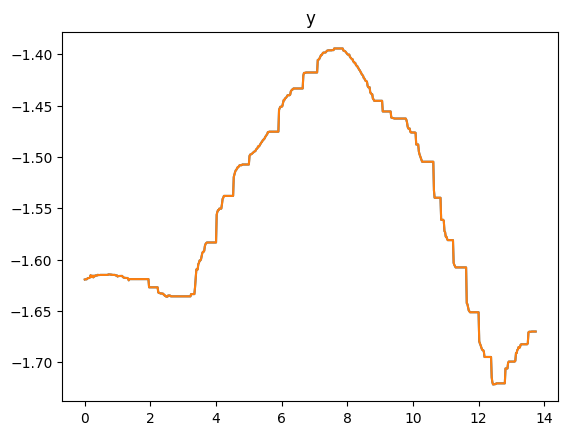

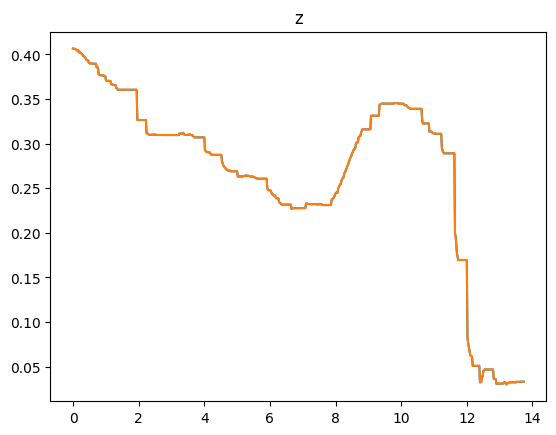

In [32]:
run = '2'
h_thr = 1.5
v_thr = 1.5
a_thr = 0.7

raw_file = f"../logs/real/raw/{run}.log"
filt_file = f"../logs/real/filt/{run}.log"

os.system("../build/filter_test {} {} {:.3f} {:.3f} {:.3f}".format(raw_file, filt_file, h_thr, v_thr, a_thr))


df = pd.read_csv(raw_file, header=None, names=['tag', 'ts', 'v1', 'v2', 'v3', 'v4'])
df = df[df.tag == 'pos']
df = df.rename({'v1' : 'x', 'v2' : 'y', 'v3' : 'z', 'v4' : 'a'}, axis=1)

df_filt = pd.read_csv(filt_file, header=None, names=['tag', 'ts', 'v1', 'v2', 'v3', 'v4'])
df_filt = df_filt[df_filt.tag == 'pos']
df_filt = df_filt.rename({'v1' : 'x', 'v2' : 'y', 'v3' : 'z', 'v4' : 'a'}, axis=1)


dt = 0.02
for v in ['a', 'x', 'y', 'z']:
	plt.plot(df.ts*dt, df[v])
	plt.plot(df_filt.ts*dt, df_filt[v])
	plt.title(v)
	plt.show()